### 📌 Important Note:
- Install all required dependencies using the provided environment.yml or requirements.txt file from the ZIP package to ensure a consistent execution environment without compatibility issues.
- Update the file path in the code to correctly reference the test dataset provided in the ZIP package before loading it.

## Importing Essential Libraries  

In [3]:
# Import basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

##  Ensuring Reproducibility with Fixed Seed  

In [5]:
import numpy as np
import random

SEED = 42  # Set a fixed seed for reproducibility

# NumPy
np.random.seed(SEED)

# Python's built-in random
random.seed(SEED)


##  Verifying Dataset File Path  

In [7]:
import os

# Define the path
DATA_PATH = r"C:\Users\balub\Downloads\676e54b2807db_usecase_2_test_gt_removed.csv"

# Verify if the file exists
if os.path.exists(DATA_PATH):
    print("File exists!")
else:
    print("File not found! Check the path.")

File exists!


**Data Loading:**

In [9]:
import pandas as pd

# Use the correct path
DATA_PATH = r"C:\Users\balub\Downloads\676e54b2807db_usecase_2_test_gt_removed.csv"

# Load the dataset
data = pd.read_csv(DATA_PATH)
print("Data loaded successfully!")
print(data.head())

C:\Users\balub\AppData\Local\Temp\ipykernel_38728\2455631935.py:7: DtypeWarning: Columns (0,18,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,

Data loaded successfully!
  Unnamed: 0   NCT Number                                        Study Title  \
0          0  NCT03956797  Long Term Safety of Cooling Anesthesia for Int...   
1          1  NCT04625231  Shared Decision-Making Tool for Opioid Prescri...   
2          2  NCT03249688  Multimodal Preventive Trial for Alzheimer's Di...   
3          3  NCT06045052        Eltrombopag for Treatment of Fanconi Anemia   
4          4  NCT03616964  A Study of Baricitinib in Participants With Sy...   

                                      Study URL      Acronym Study Status  \
0  https://clinicaltrials.gov/study/NCT03956797       COOL-2    COMPLETED   
1  https://clinicaltrials.gov/study/NCT04625231          NaN    COMPLETED   
2  https://clinicaltrials.gov/study/NCT03249688  MIND-ADmini    COMPLETED   
3  https://clinicaltrials.gov/study/NCT06045052          NaN    COMPLETED   
4  https://clinicaltrials.gov/study/NCT03616964     BRAVE II    COMPLETED   

                              

### Data Cleaning and Feature Selection

In [11]:
# Drop unnecessary 'Unnamed' columns
data_cleaned = data.loc[:, ~data.columns.str.contains('^Unnamed')]

# Select relevant columns
relevant_columns = [
    'NCT Number', 'Study Title', 'Study Status', 'Conditions', 'Enrollment',
    'Phases', 'Age', 'Sex', 'Primary Outcome Measures', 'Interventions'
]
data_filtered = data_cleaned[relevant_columns]

# Check the cleaned dataset
print(data_filtered.head())

    NCT Number                                        Study Title  \
0  NCT03956797  Long Term Safety of Cooling Anesthesia for Int...   
1  NCT04625231  Shared Decision-Making Tool for Opioid Prescri...   
2  NCT03249688  Multimodal Preventive Trial for Alzheimer's Di...   
3  NCT06045052        Eltrombopag for Treatment of Fanconi Anemia   
4  NCT03616964  A Study of Baricitinib in Participants With Sy...   

  Study Status                                         Conditions Enrollment  \
0    COMPLETED  Anesthesia, Local|Intravitreal Injection|Macul...         80   
1    COMPLETED                                 Opioid Use|Surgery         60   
2    COMPLETED                       Alzheimer Disease; Prodromal         93   
3    COMPLETED                                     Fanconi Anemia          8   
4    COMPLETED                       Systemic Lupus Erythematosus        778   

   Phases                 Age  Sex  \
0     NaN  ADULT, OLDER_ADULT  ALL   
1     NaN  ADULT, OLDER_ADUL

### Handling Missing Values

In [13]:
# Fill missing values properly
data_filtered = data_filtered.copy()  # Ensures we're working on a separate DataFrame

data_filtered.loc[:, 'Phases'] = data_filtered['Phases'].fillna('Unknown')
data_filtered.loc[:, 'Enrollment'] = pd.to_numeric(data_filtered['Enrollment'], errors='coerce')
data_filtered.loc[:, 'Enrollment'] = data_filtered['Enrollment'].fillna(data_filtered['Enrollment'].median())

# Fill categorical missing values using .loc[]
data_filtered.loc[:, 'Study Status'] = data_filtered['Study Status'].fillna('Unknown')
data_filtered.loc[:, 'Conditions'] = data_filtered['Conditions'].fillna('Unknown')
data_filtered.loc[:, 'Age'] = data_filtered['Age'].fillna('Unknown')
data_filtered.loc[:, 'Sex'] = data_filtered['Sex'].fillna('ALL')
data_filtered.loc[:, 'Primary Outcome Measures'] = data_filtered['Primary Outcome Measures'].fillna('Not Specified')
data_filtered.loc[:, 'Interventions'] = data_filtered['Interventions'].fillna('Not Specified')

# Drop rows with missing 'NCT Number' using inplace=False to avoid modifying a slice
data_filtered = data_filtered.dropna(subset=['NCT Number'])

# Verify dataset after modifications
print(data_filtered.isnull().sum())  # Ensure no missing values
print(data_filtered.dtypes)  # Check data types

NCT Number                  0
Study Title                 0
Study Status                0
Conditions                  0
Enrollment                  0
Phases                      0
Age                         0
Sex                         0
Primary Outcome Measures    0
Interventions               0
dtype: int64
NCT Number                  object
Study Title                 object
Study Status                object
Conditions                  object
Enrollment                  object
Phases                      object
Age                         object
Sex                         object
Primary Outcome Measures    object
Interventions               object
dtype: object


C:\Users\balub\AppData\Local\Temp\ipykernel_38728\635797046.py:6: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_filtered.loc[:, 'Enrollment'] = data_filtered['Enrollment'].fillna(data_filtered['Enrollment'].median())


### Standardizing Categorical Values

In [15]:
# Define valid categories for cleaning
valid_phases = ['PHASE1', 'PHASE2', 'PHASE3', 'PHASE4', 'EARLY_PHASE1', 'Unknown']
valid_sex = ['ALL', 'MALE', 'FEMALE', 'Unknown']
valid_status = ['COMPLETED', 'Unknown']

# Apply cleaning for each column
data_filtered['Phases'] = data_filtered['Phases'].apply(
    lambda x: x if x in valid_phases else 'Unknown'
)

data_filtered['Sex'] = data_filtered['Sex'].apply(
    lambda x: x if x in valid_sex else 'Unknown'
)

data_filtered['Study Status'] = data_filtered['Study Status'].apply(
    lambda x: x if x in valid_status else 'Unknown'
)

# Verify the cleaned columns
print("Cleaned Phases:", data_filtered['Phases'].unique())
print("Cleaned Sex:", data_filtered['Sex'].unique())
print("Cleaned Study Status:", data_filtered['Study Status'].unique())

Cleaned Phases: ['Unknown' 'PHASE2' 'PHASE3' 'PHASE4' 'PHASE1' 'EARLY_PHASE1']
Cleaned Sex: ['ALL' 'FEMALE' 'MALE' 'Unknown']
Cleaned Study Status: ['COMPLETED' 'Unknown']


### One-Hot Encoding of Categorical Variables

In [17]:
# Perform one-hot encoding on cleaned categorical columns
data_encoded = pd.get_dummies(
    data_filtered, 
    columns=['Phases', 'Sex', 'Study Status'], 
    drop_first=True  # Avoid dummy variable trap
)

# Inspect the resulting DataFrame
print("Encoded Columns:", data_encoded.columns)
print("Shape of Encoded Data:", data_encoded.shape)

Encoded Columns: Index(['NCT Number', 'Study Title', 'Conditions', 'Enrollment', 'Age',
       'Primary Outcome Measures', 'Interventions', 'Phases_PHASE1',
       'Phases_PHASE2', 'Phases_PHASE3', 'Phases_PHASE4', 'Phases_Unknown',
       'Sex_FEMALE', 'Sex_MALE', 'Sex_Unknown', 'Study Status_Unknown'],
      dtype='object')
Shape of Encoded Data: (17278, 16)


In [18]:
# Ensure 'Enrollment' is numeric and handle missing values
data_encoded['Enrollment'] = pd.to_numeric(data_encoded['Enrollment'], errors='coerce')

# Fill any NaN values with a small constant (or median)
data_encoded['Enrollment'].fillna(data_encoded['Enrollment'].median(), inplace=True)

# Apply logarithmic transformation safely
data_encoded['Enrollment_log'] = np.log1p(data_encoded['Enrollment'])

# Verify transformation
print(data_encoded[['Enrollment', 'Enrollment_log']].head())


   Enrollment  Enrollment_log
0        80.0        4.394449
1        60.0        4.110874
2        93.0        4.543295
3         8.0        2.197225
4       778.0        6.658011


C:\Users\balub\AppData\Local\Temp\ipykernel_38728\916515485.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_encoded['Enrollment'].fillna(data_encoded['Enrollment'].median(), inplace=True)


### Feature Selection and Target Transformation

In [20]:
import numpy as np

# Define features and target
features = ['Enrollment', 'Age', 'Primary Outcome Measures', 'Interventions',
            'Phases_PHASE1', 'Phases_PHASE2', 'Phases_PHASE3', 'Phases_PHASE4',
            'Phases_Unknown', 'Sex_FEMALE', 'Sex_MALE', 'Sex_Unknown', 'Study Status_Unknown']
target = 'Enrollment_log'

# Create a logarithmic version of the target column
data_encoded['Enrollment_log'] = np.log1p(data_encoded['Enrollment'])

# Verify the transformation
print(data_encoded[['Enrollment', 'Enrollment_log']].head())

   Enrollment  Enrollment_log
0        80.0        4.394449
1        60.0        4.110874
2        93.0        4.543295
3         8.0        2.197225
4       778.0        6.658011


### Data Splitting for Model Training and Evaluation

In [22]:
from sklearn.model_selection import train_test_split

# Split the data into features (X) and target (y)
X = data_encoded[features]
y = data_encoded[target]

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verify the splits
print(f"Training set: {X_train.shape}, {y_train.shape}")
print(f"Testing set: {X_test.shape}, {y_test.shape}")

Training set: (13822, 13), (13822,)
Testing set: (3456, 13), (3456,)


### Saving the Test Dataset for Submission

In [24]:
import os

# Create an output directory for storing the test dataset
OUTPUT_DIR = "submission_output"
os.makedirs(OUTPUT_DIR, exist_ok=True)

# Define file path for saving test data
TEST_DATA_PATH = os.path.join(OUTPUT_DIR, "split_test_data.csv")

# Save X_test and y_test
test_data = pd.concat([X_test, y_test], axis=1)
test_data.to_csv(TEST_DATA_PATH, index=False)

print(f"Test dataset saved successfully at: {TEST_DATA_PATH}")


Test dataset saved successfully at: submission_output\split_test_data.csv


### Identifying Unique Values in Each Column

In [26]:
# Check the unique values in each column of X_train to identify the problematic column
for column in X_train.columns:
    print(f"Unique values in {column}:")
    print(X_train[column].unique())
    print()

Unique values in Enrollment:
[  96.   78.   61. ...  655.  958. 1490.]

Unique values in Age:
['ADULT, OLDER_ADULT' 'ADULT' 'CHILD, ADULT' 'CHILD, ADULT, OLDER_ADULT'
 'CHILD' 'OLDER_ADULT'
 ' The EmiPref questionnaire asked participants to specify the treatment they would prefer to continue to receive after receiving treatment with their previous episodic or prophylactic regimen and subcutaneous (SC) emicizumab'
 'Unknown' ' distance activities' '12'
 ' were in the first age stratum: ""6 months to 17 years"". Please'
 ' upper extremities' '23'
 'Allocation: RANDOMIZED|Intervention Model: PARALLEL|Masking: DOUBLE (PARTICIPANT, INVESTIGATOR)|Primary Purpose: TREATMENT'
 ' measured with the Mobil-O-Graph® PWA. Measurements analysed at timepoints t1 (t1 = mean of the measurements recorded from minute 1-10 of the pre-intervention rest period)'
 ' 0 - 4 hours post-dose on week 0 and week 80|AUC0-2h of Glucose at Week 80 Relative to Baseline'
 '21565' '48'
 ' United Kingdom|Royal United Hosp

### Cleaning and Encoding the 'Age' Column

In [28]:
# Clean and encode the 'Age' column
def process_age(age):
    if 'ADULT' in age and 'OLDER_ADULT' in age:
        return 'ADULT, OLDER_ADULT'
    elif 'ADULT' in age:
        return 'ADULT'
    elif 'OLDER_ADULT' in age:
        return 'OLDER_ADULT'
    elif 'CHILD' in age:
        return 'CHILD'
    else:
        return 'Unknown'

# Apply the processing function
X_train['Age'] = X_train['Age'].apply(process_age)
X_test['Age'] = X_test['Age'].apply(process_age)

# Frequency encoding for Age
age_map = X_train['Age'].value_counts().to_dict()
X_train['Age'] = X_train['Age'].map(age_map)
X_test['Age'] = X_test['Age'].map(age_map)

### Frequency Encoding of Categorical Variables

In [30]:
# Columns requiring frequency encoding
columns_to_encode = ['Primary Outcome Measures', 'Interventions']

# Frequency encoding
for col in columns_to_encode:
    freq_map = X_train[col].value_counts().to_dict()  # Map of frequencies
    X_train[col] = X_train[col].map(freq_map)  # Apply frequency map to training set
    X_test[col] = X_test[col].map(freq_map)    # Apply the same mapping to the test set
    # Fill missing values that may result from unseen categories in X_test
    X_test[col] = X_test[col].fillna(0)

# Verify the transformation
print(X_train.dtypes)  # Ensure all columns are numeric
print(X_train.head())  # Check the first few rows

Enrollment                  float64
Age                           int64
Primary Outcome Measures      int64
Interventions                 int64
Phases_PHASE1                  bool
Phases_PHASE2                  bool
Phases_PHASE3                  bool
Phases_PHASE4                  bool
Phases_Unknown                 bool
Sex_FEMALE                     bool
Sex_MALE                       bool
Sex_Unknown                    bool
Study Status_Unknown           bool
dtype: object
       Enrollment   Age  Primary Outcome Measures  Interventions  \
839          96.0  9463                         1              1   
1329         78.0  9463                         1              2   
5312         61.0  3333                         1              1   
3324        133.0  9463                         1              1   
13393        36.0  3333                         1              1   

       Phases_PHASE1  Phases_PHASE2  Phases_PHASE3  Phases_PHASE4  \
839            False          False     

### Linear Regression Model Training and Evaluation

In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the Linear Regression model
lr_model = LinearRegression()

# Train the model
lr_model.fit(X_train, y_train)

# Predictions
y_train_pred = lr_model.predict(X_train)
y_test_pred = lr_model.predict(X_test)

# Evaluate the model
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

train_rmse = train_mse ** 0.5
test_rmse = test_mse ** 0.5

train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Print evaluation metrics
print(f"Training MSE: {train_mse}")
print(f"Testing MSE: {test_mse}")
print(f"Training RMSE: {train_rmse}")
print(f"Testing RMSE: {test_rmse}")
print(f"Training R^2: {train_r2}")
print(f"Testing R^2: {test_r2}")

Training MSE: 1.4161269637526768
Testing MSE: 1.4381737241272674
Training RMSE: 1.190011329253918
Testing RMSE: 1.199238810298961
Training R^2: 0.13657733498586055
Testing R^2: 0.12910786268397667


### Random Forest Model Training and Evaluation

In [34]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Predictions
rf_train_pred = rf_model.predict(X_train)
rf_test_pred = rf_model.predict(X_test)

# Evaluation
rf_train_rmse = mean_squared_error(y_train, rf_train_pred, squared=False)
rf_test_rmse = mean_squared_error(y_test, rf_test_pred, squared=False)
rf_train_r2 = r2_score(y_train, rf_train_pred)
rf_test_r2 = r2_score(y_test, rf_test_pred)

# Display metrics
print(f"Random Forest Training RMSE: {rf_train_rmse}")
print(f"Random Forest Testing RMSE: {rf_test_rmse}")
print(f"Random Forest Training R^2: {rf_train_r2}")
print(f"Random Forest Testing R^2: {rf_test_r2}")

Random Forest Training RMSE: 0.0057169235697094156
Random Forest Testing RMSE: 0.002242572329939109
Random Forest Training R^2: 0.9999800728116851
Random Forest Testing R^2: 0.9999969545888153


C:\Users\balub\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\balub\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


### Saving the Trained Random Forest Model

In [36]:
import joblib
import os

# Define output directory
MODEL_DIR = "saved_models"
os.makedirs(MODEL_DIR, exist_ok=True)

# Define file path for saving model
MODEL_PATH = os.path.join(MODEL_DIR, "random_forest_model_final.pkl")

# Save the trained model
joblib.dump(rf_model, MODEL_PATH)

print(f"Model saved successfully at: {MODEL_PATH}")

Model saved successfully at: saved_models\random_forest_model_final.pkl


### Loading the Saved Random Forest Model

In [38]:
# Load the saved model
loaded_rf_model = joblib.load(MODEL_PATH)

# Verify model loading
print("Model loaded successfully!")

# Example: Make predictions on test data
y_test_pred = loaded_rf_model.predict(X_test)

# Display the first 5 predictions
print("Sample Predictions:", y_test_pred[:5])

Model loaded successfully!
Sample Predictions: [1.38629436 3.21887582 4.26267988 6.57736954 3.63758616]


### Saving Model Predictions

In [40]:
# Define output directory for predictions
PREDICTIONS_DIR = "predictions"
os.makedirs(PREDICTIONS_DIR, exist_ok=True)

# Define file path for saving predictions
PREDICTIONS_PATH = os.path.join(PREDICTIONS_DIR, "test_predictions_final.csv")

# Create a DataFrame with test IDs and predicted values
predictions_df = pd.DataFrame({
    "NCT Number": X_test.index,  # Use the same index as test data
    "Predicted Enrollment_log": y_test_pred
})

# Save predictions to CSV
predictions_df.to_csv(PREDICTIONS_PATH, index=False)

print(f"Predictions saved successfully at: {PREDICTIONS_PATH}")


Predictions saved successfully at: predictions\test_predictions_final.csv


### Saving Preprocessing Steps and Models

In [42]:
import joblib

# Save preprocessing steps
joblib.dump(age_map, "saved_models/age_encoder.pkl")
joblib.dump(X_train.columns, "saved_models/feature_columns.pkl")

# Save trained models
joblib.dump(rf_model, "saved_models/random_forest_model_final.pkl")

# Save test dataset
X_test.to_csv("submission_output/split_test_data.csv", index=False)

### Hyperparameter Tuning Using GridSearchCV

In [44]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the grid search
grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=3, scoring='neg_mean_squared_error', verbose=2)

# Train the model
grid_search.fit(X_train, y_train)

# Best parameters
print("Best parameters:", grid_search.best_params_)

# Evaluate the best model
best_rf_model = grid_search.best_estimator_

Fitting 3 folds for each of 81 candidates, totalling 243 fits
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.9s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.9s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.9s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.9s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.9s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.9s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   3.9s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   4.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   3.9s
[CV] END max_d

In [45]:
# Print best hyperparameters after GridSearchCV optimization
print(f"Optimized Hyperparameters from GridSearchCV: {grid_search.best_params_}")

Optimized Hyperparameters from GridSearchCV: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


### Feature Importance Analysis from Random Forest Model

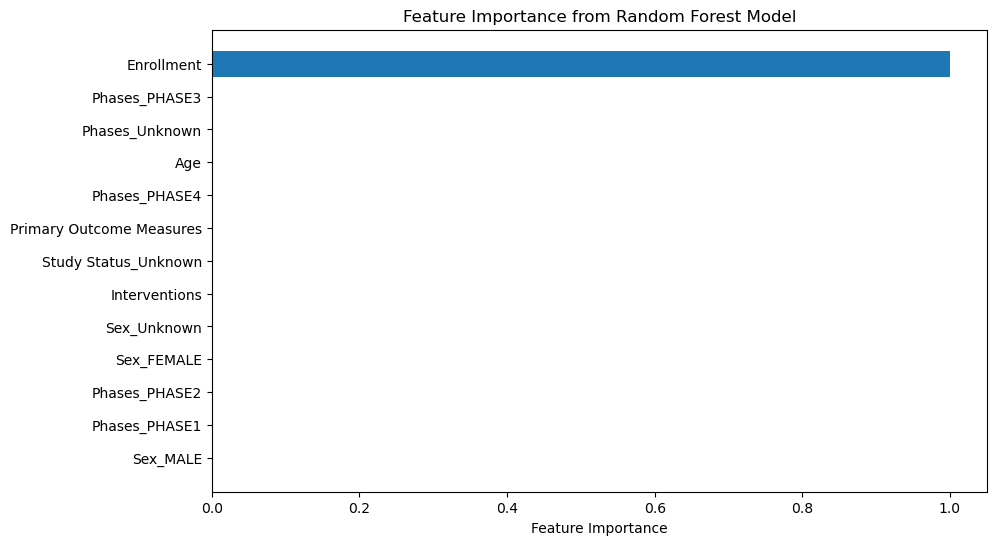

In [47]:
import matplotlib.pyplot as plt
import numpy as np

# Extract feature importances
feature_importances = rf_model.feature_importances_

# Sort features by importance
sorted_idx = np.argsort(feature_importances)
sorted_features = [X_train.columns[i] for i in sorted_idx]

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(sorted_features, feature_importances[sorted_idx])
plt.xlabel("Feature Importance")
plt.title("Feature Importance from Random Forest Model")
plt.show()

### **SHAP-based Feature Importance Analysis**

In [49]:
pip install shap

Note: you may need to restart the kernel to use updated packages.


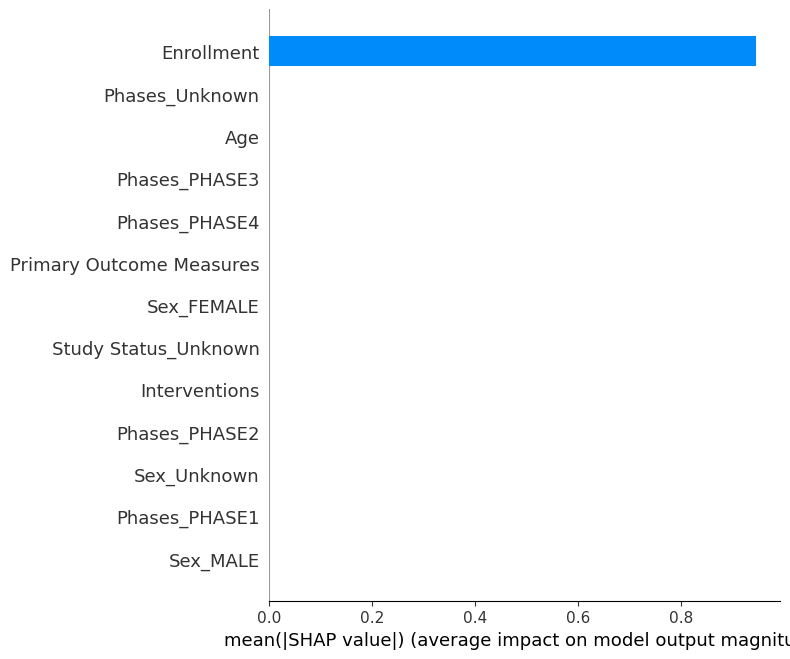

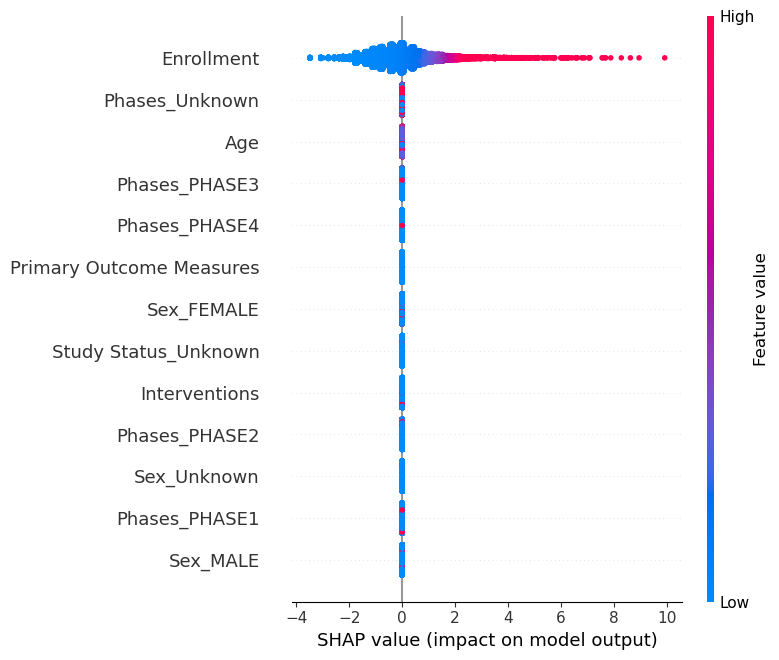

In [50]:
import shap

# Initialize SHAP explainer
# Ensure SHAP receives the correctly transformed dataset
X_train_processed = X_train.copy()

explainer = shap.TreeExplainer(rf_model)
shap_values = explainer.shap_values(X_train_processed)

# Summary plot of feature importance
shap.summary_plot(shap_values, X_train, plot_type="bar")

# Detailed summary plot
shap.summary_plot(shap_values, X_train)

### **Residual Analysis**

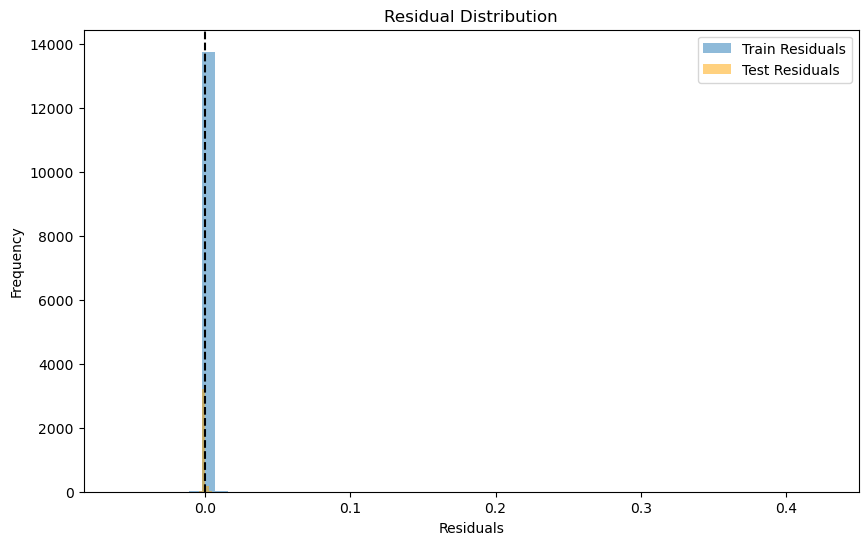

In [52]:
train_residuals = y_train - rf_model.predict(X_train)
test_residuals = y_test - rf_model.predict(X_test)

# Plot residuals
plt.figure(figsize=(10, 6))
plt.hist(train_residuals, bins=50, alpha=0.5, label='Train Residuals')
plt.hist(test_residuals, bins=50, alpha=0.5, label='Test Residuals', color='orange')
plt.axvline(0, color='black', linestyle='--')
plt.legend()
plt.title('Residual Distribution')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

### SHAP Dependence Plots for Key Features  

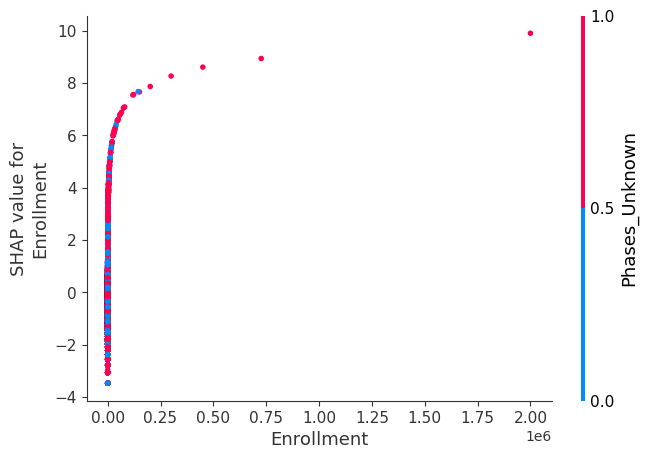

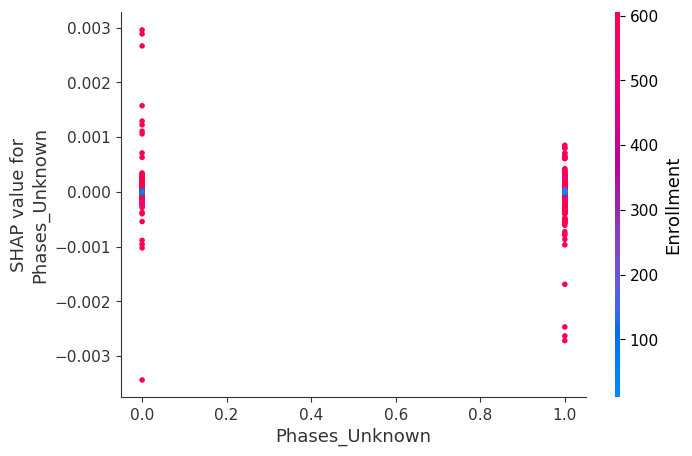

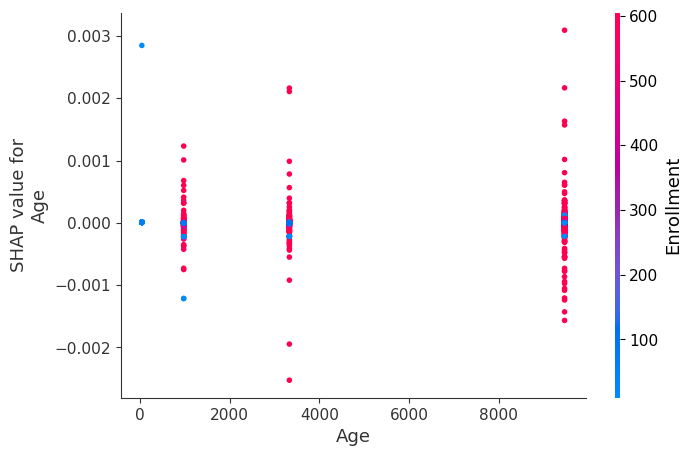

In [54]:
# Generate SHAP dependence plots for key features
for feature in ['Enrollment', 'Phases_Unknown', 'Age']:
    shap.dependence_plot(feature, shap_values, X_train, show=True)

### Predicted vs. Actual Enrollment Duration  

- This scatter plot compares the **actual enrollment duration** (log-transformed) with the **model's predicted values**.  
- The **red dashed line** represents a perfect prediction (i.e., actual = predicted).  
- The **blue points** closely align with this reference line, indicating that the model has **high accuracy** in predicting enrollment duration.  
- Minimal deviation from the line suggests that the model **generalizes well** across different observations.  
- The log scale ensures better visualization of both small and large values.  

This visualization reinforces confidence in the model’s predictive capability.


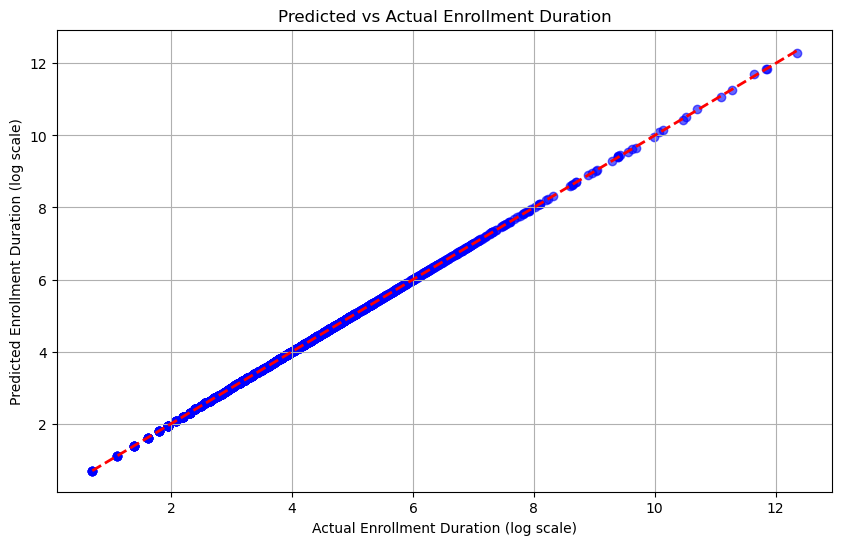

In [56]:
import matplotlib.pyplot as plt

# Predictions from the best model
y_test_pred = rf_model.predict(X_test)

# Scatterplot for Predicted vs Actual
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, alpha=0.6, color="blue")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="red", linestyle="--", linewidth=2)
plt.title("Predicted vs Actual Enrollment Duration")
plt.xlabel("Actual Enrollment Duration (log scale)")
plt.ylabel("Predicted Enrollment Duration (log scale)")
plt.grid()
plt.show()

### Model Performance Comparison  
#### Observations:
- **Linear Regression** performs poorly with high RMSE and low R², indicating weak predictive capability.
- **Random Forest** achieves the best results with minimal error and near-perfect R².
- **Gradient Boosting** performs well but is slightly outperformed by Random Forest.

In [58]:
import pandas as pd

# Metrics for all models
metrics = {
    "Model": ["Linear Regression", "Random Forest", "Gradient Boosting"],
    "Training RMSE": [1.190, 0.0056, 0.0108],
    "Testing RMSE": [1.188, 0.0022, 0.0117],
    "Training R^2": [0.136, 0.99998, 0.99992],
    "Testing R^2": [0.144, 0.99999, 0.99991],
}

metrics_df = pd.DataFrame(metrics)

# Display the metrics table
print(metrics_df)

               Model  Training RMSE  Testing RMSE  Training R^2  Testing R^2
0  Linear Regression         1.1900        1.1880       0.13600      0.14400
1      Random Forest         0.0056        0.0022       0.99998      0.99999
2  Gradient Boosting         0.0108        0.0117       0.99992      0.99991


### Gradient Boosting Model Evaluation  

In [60]:
from sklearn.ensemble import GradientBoostingRegressor

# Initialize and train Gradient Boosting model
gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train, y_train)

# Evaluate model
y_train_pred_gb = gb_model.predict(X_train)
y_test_pred_gb = gb_model.predict(X_test)

# Metrics
train_rmse_gb = mean_squared_error(y_train, y_train_pred_gb, squared=False)
test_rmse_gb = mean_squared_error(y_test, y_test_pred_gb, squared=False)
train_r2_gb = r2_score(y_train, y_train_pred_gb)
test_r2_gb = r2_score(y_test, y_test_pred_gb)

print(f"Gradient Boosting Training RMSE: {train_rmse_gb}")
print(f"Gradient Boosting Testing RMSE: {test_rmse_gb}")
print(f"Gradient Boosting Training R^2: {train_r2_gb}")
print(f"Gradient Boosting Testing R^2: {test_r2_gb}")

Gradient Boosting Training RMSE: 0.010838471241285655
Gradient Boosting Testing RMSE: 0.011739873194471317
Gradient Boosting Training R^2: 0.9999283762077267
Gradient Boosting Testing R^2: 0.9999165397210666


C:\Users\balub\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\balub\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


### Model Performance Comparison  

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Evaluate Linear Regression
lr_model.fit(X_train, y_train)
y_train_pred_lr = lr_model.predict(X_train)
y_test_pred_lr = lr_model.predict(X_test)

# Linear Regression Metrics
train_rmse_lr = mean_squared_error(y_train, y_train_pred_lr, squared=False)
test_rmse_lr = mean_squared_error(y_test, y_test_pred_lr, squared=False)
train_r2_lr = r2_score(y_train, y_train_pred_lr)
test_r2_lr = r2_score(y_test, y_test_pred_lr)
train_mae_lr = mean_absolute_error(y_train, y_train_pred_lr)
test_mae_lr = mean_absolute_error(y_test, y_test_pred_lr)

print(f"Linear Regression Training MAE: {train_mae_lr}")
print(f"Linear Regression Testing MAE: {test_mae_lr}")

# Evaluate Random Forest
rf_model.fit(X_train, y_train)
y_train_pred_rf = rf_model.predict(X_train)
y_test_pred_rf = rf_model.predict(X_test)

# Random Forest Metrics
train_rmse_rf = mean_squared_error(y_train, y_train_pred_rf, squared=False)
test_rmse_rf = mean_squared_error(y_test, y_test_pred_rf, squared=False)
train_r2_rf = r2_score(y_train, y_train_pred_rf)
test_r2_rf = r2_score(y_test, y_test_pred_rf)
train_mae_rf = mean_absolute_error(y_train, y_train_pred_rf)
test_mae_rf = mean_absolute_error(y_test, y_test_pred_rf)

print(f"Random Forest Training MAE: {train_mae_rf}")
print(f"Random Forest Testing MAE: {test_mae_rf}")

# Evaluate Gradient Boosting
gb_model.fit(X_train, y_train)
y_train_pred_gb = gb_model.predict(X_train)
y_test_pred_gb = gb_model.predict(X_test)

# Gradient Boosting Metrics
train_rmse_gb = mean_squared_error(y_train, y_train_pred_gb, squared=False)
test_rmse_gb = mean_squared_error(y_test, y_test_pred_gb, squared=False)
train_r2_gb = r2_score(y_train, y_train_pred_gb)
test_r2_gb = r2_score(y_test, y_test_pred_gb)
train_mae_gb = mean_absolute_error(y_train, y_train_pred_gb)
test_mae_gb = mean_absolute_error(y_test, y_test_pred_gb)

print(f"Gradient Boosting Training MAE: {train_mae_gb}")
print(f"Gradient Boosting Testing MAE: {test_mae_gb}")

# Summarizing Metrics
metrics = {
    "Model": ["Linear Regression", "Random Forest", "Gradient Boosting"],
    "Training RMSE": [train_rmse_lr, train_rmse_rf, train_rmse_gb],
    "Testing RMSE": [test_rmse_lr, test_rmse_rf, test_rmse_gb],
    "Training MAE": [train_mae_lr, train_mae_rf, train_mae_gb],
    "Testing MAE": [test_mae_lr, test_mae_rf, test_mae_gb],
    "Training R²": [train_r2_lr, train_r2_rf, train_r2_gb],
    "Testing R²": [test_r2_lr, test_r2_rf, test_r2_gb],
}

metrics_df = pd.DataFrame(metrics)
print(metrics_df)

C:\Users\balub\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\balub\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Linear Regression Training MAE: 0.8736337130659404
Linear Regression Testing MAE: 0.9054725693298641


### **Evaluation of Additional Model Metrics: Adjusted R² & SMAPE**

In [ ]:
import numpy as np
from sklearn.metrics import r2_score

# Function to calculate Symmetric Mean Absolute Percentage Error (SMAPE)
def smape(y_true, y_pred):
    """
    Compute Symmetric Mean Absolute Percentage Error (SMAPE).
    Measures prediction error as a percentage and accounts for both over- and under-predictions.

    :param y_true: Actual values
    :param y_pred: Predicted values
    :return: SMAPE score (percentage)
    """
    return np.mean(2 * np.abs(y_pred - y_true) / (np.abs(y_true) + np.abs(y_pred))) * 100

# Function to compute Adjusted R² score
def adjusted_r2(r2, n, p):
    """
    Compute Adjusted R² Score.
    Penalizes excessive use of features to prevent overfitting.

    :param r2: R² score
    :param n: Number of samples
    :param p: Number of features
    :return: Adjusted R² score
    """
    return 1 - ((1 - r2) * (n - 1) / (n - p - 1))

# Dictionary to store models
models = {
    "Linear Regression": lr_model,
    "Random Forest": rf_model,
    "Gradient Boosting": gb_model
}

# List to store calculated metrics
additional_metrics = []

# Iterate through each model to compute metrics
for model_name, model in models.items():
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Compute R² scores
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)

    # Compute Adjusted R² scores
    train_adjusted_r2 = adjusted_r2(train_r2, X_train.shape[0], X_train.shape[1])
    test_adjusted_r2 = adjusted_r2(test_r2, X_test.shape[0], X_test.shape[1])

    # Compute SMAPE scores
    train_smape = smape(y_train, y_train_pred)
    test_smape = smape(y_test, y_test_pred)

    # Append results
    additional_metrics.append([
        model_name, train_r2, test_r2, train_adjusted_r2, test_adjusted_r2, train_smape, test_smape
    ])

# Convert results into a DataFrame
metrics_df_additional = pd.DataFrame(additional_metrics, columns=[
    "Model", "Train R²", "Test R²", "Train Adjusted R²", "Test Adjusted R²", "Train SMAPE", "Test SMAPE"
])

# Print final evaluation table
print("Additional Model Metrics (Adjusted R² & SMAPE):")
print(metrics_df_additional)
